# Heart Disease Classifier 

**GOAL: Creating a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

## Imports

**Timporting the necessary libraries.**

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [2]:
df = pd.read_csv('DATA/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].unique()

array([1, 0], dtype=int64)

### Exploratory Data Analysis and Visualization

**Exploring if the dataset has any missing data points and create a statistical summary of the numerical features as shown below.**

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Visualization

**Creating a bar plot that shows the total counts per target value.**

<AxesSubplot:xlabel='target', ylabel='count'>

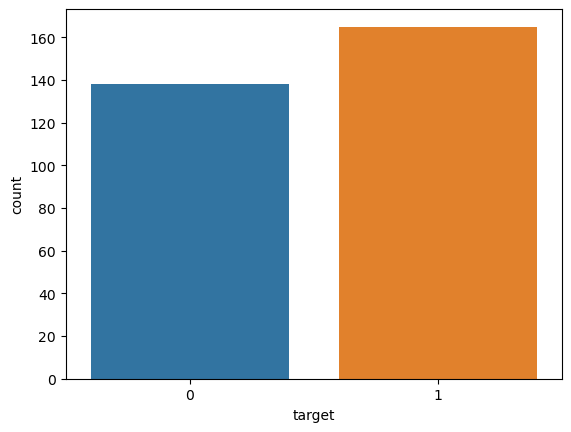

In [7]:
sns.countplot(x='target',data=df)

**Creating a pairplot that displays the relationships between the following columns:**

    ['age','trestbps', 'chol','thalach','target']

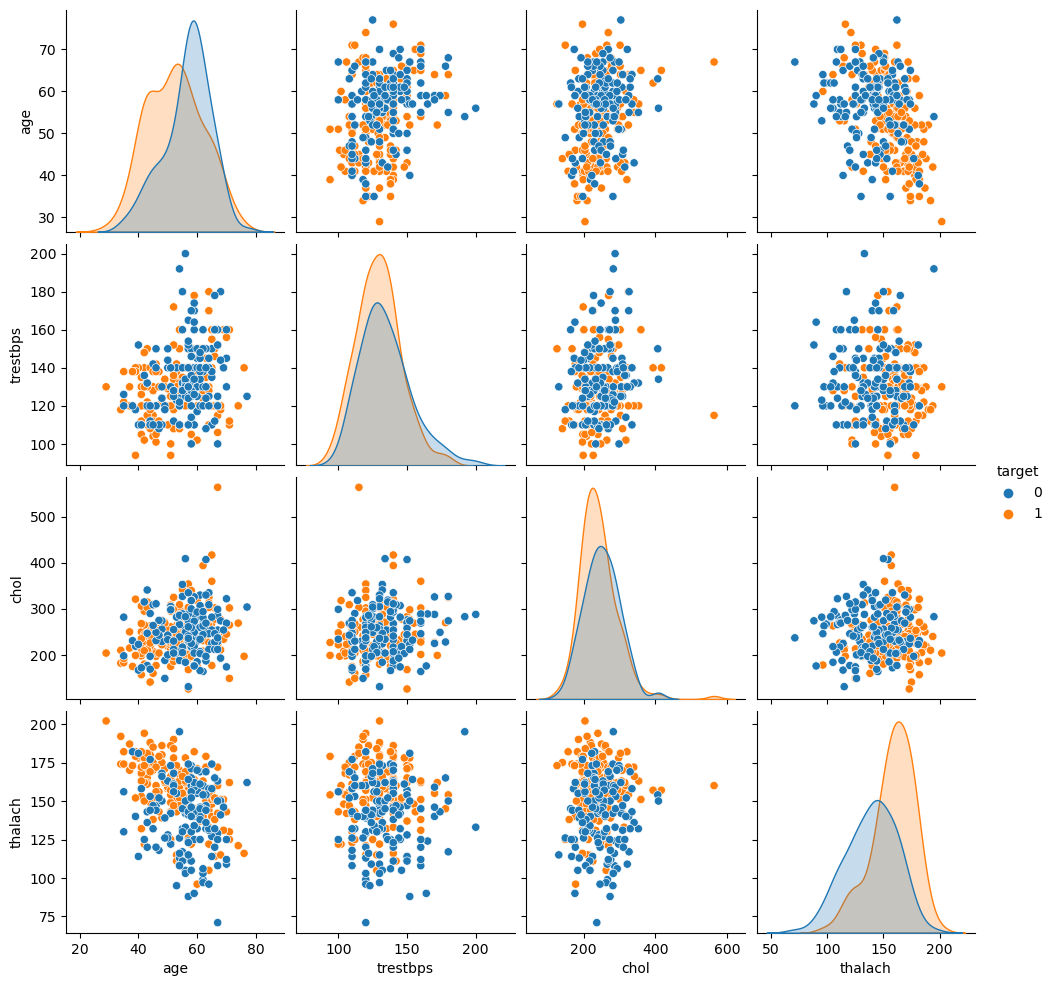

In [8]:
relation=df[['age','trestbps','chol','thalach','target']]
sns.pairplot(data=relation,hue='target',)

**Creating a heatmap that displays the correlation between all the columns.**

<AxesSubplot:>

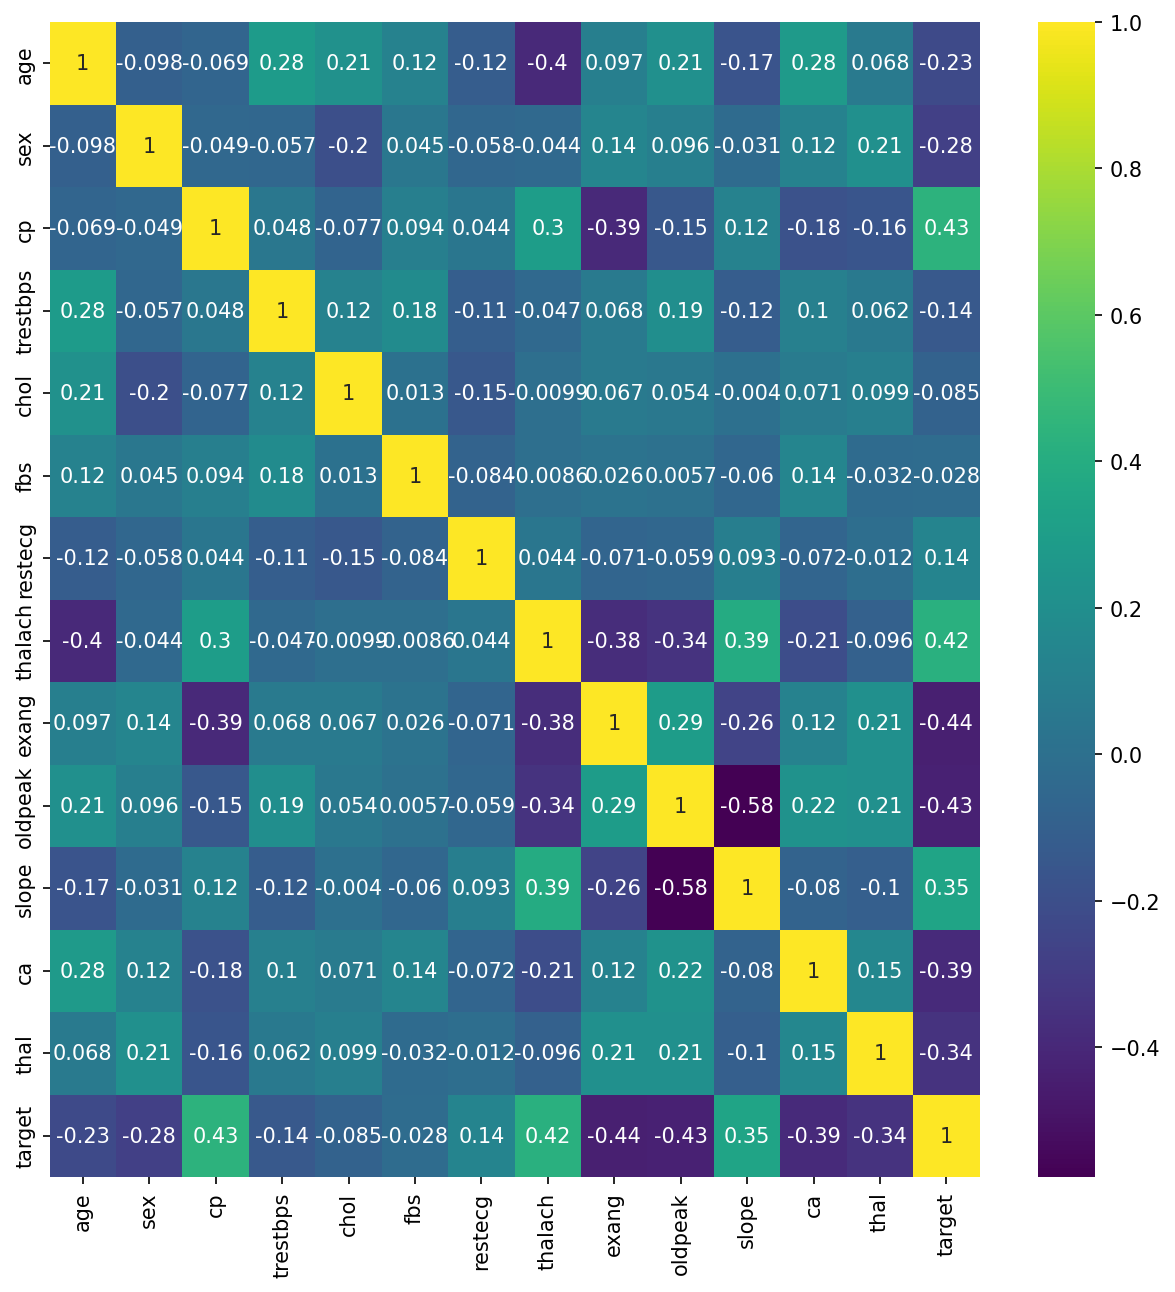

In [9]:
plt.figure(figsize=(10,10),dpi=150)
sns.heatmap(data=df.corr(),annot=True,cmap='viridis')

In [10]:
X=df.drop('target',axis=1)
y=df['target']

**Performing a train test split on the data, with the test size of 10% and a random_state of 101.**

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

**Creating a StandardScaler object and normalize the X train and test set feature data.**

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler=StandardScaler()

In [15]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Logistic Regression Model

**Creating a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search.**

In [16]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
model1=LogisticRegression(solver='saga',multi_class='ovr',max_iter=5000)

In [17]:
from sklearn.model_selection import GridSearchCV
C=np.logspace(0,4,10)
grid_params={'penalty':['l1','l2'],'C':C}

In [18]:
# help(LogisticRegressionCV)
grid=GridSearchCV(estimator=model1,param_grid=grid_params)
grid.fit(X_train,y_train)
grid.best_params_

{'C': 1.0, 'penalty': 'l1'}

In [19]:
model1=LogisticRegression(solver='saga',multi_class='ovr',max_iter=5000,penalty='l1',C=1.0)
model1.fit(X_train,y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', penalty='l1',
                   solver='saga')

In [20]:
model2=LogisticRegression(solver='saga',penalty='l1',C=1.0,multi_class='ovr')
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)

### Coeffecients

In [23]:
coeff=model1.coef_
coeff=coeff.reshape(13,)
coeff

array([-0.04781585, -0.69644494,  0.88804111, -0.23907552, -0.18653708,
        0.00230826,  0.09606904,  0.42202573, -0.40857441, -0.52470526,
        0.35753162, -0.83228722, -0.56454123])

In [26]:
columns=list(X.columns)
ser=pd.DataFrame(coeff,index=columns)
ser.reset_index(level=0, inplace=True)
ser.columns=['Attribute','Coeff']
ser

,Attribute,Coeff
0,age,-0.047816
1,sex,-0.696445
2,cp,0.888041
3,trestbps,-0.239076
4,chol,-0.186537
5,fbs,0.002308
6,restecg,0.096069
7,thalach,0.422026
8,exang,-0.408574
9,oldpeak,-0.524705


<AxesSubplot:xlabel='Attribute', ylabel='Coeff'>

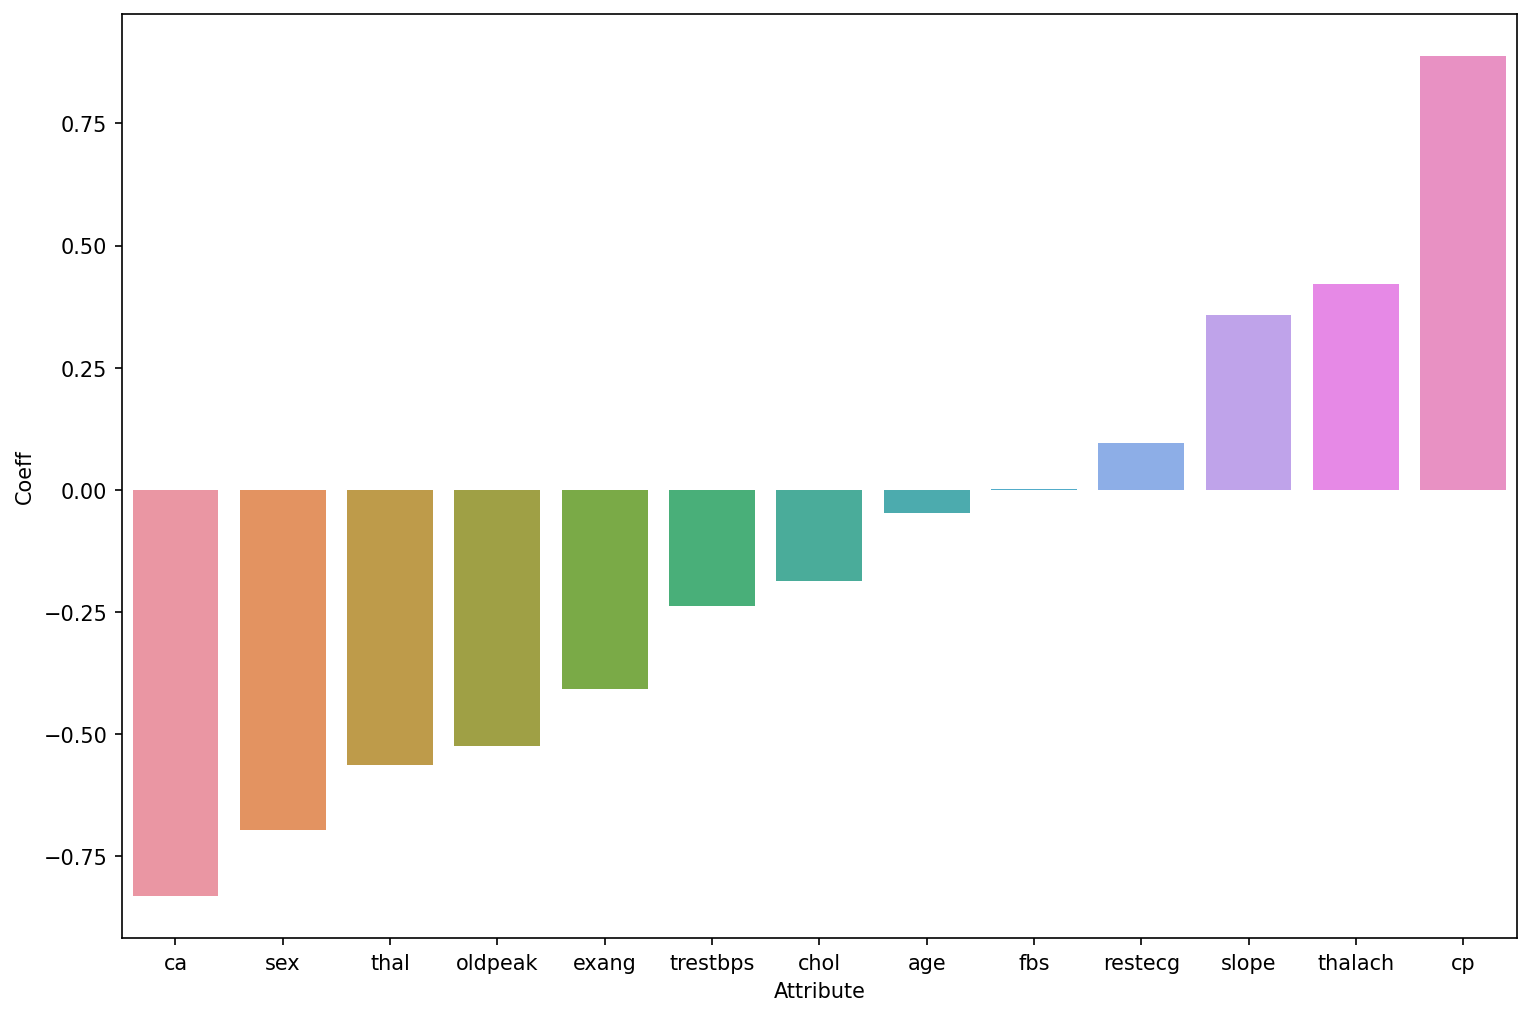

In [28]:
ser=ser.sort_values(by='Coeff')
plt.figure(figsize=(12,8),dpi=150)
sns.barplot(data=ser,x='Attribute',y='Coeff',capsize=.2)

---------

## Model Performance Evaluation

**Let's now evaluate our model on the remaining 10% of the data, the test set.**

**Creating the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [31]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
confusion_matrix(y_test,y_pred2)

array([[12,  3],
       [ 2, 14]], dtype=int64)

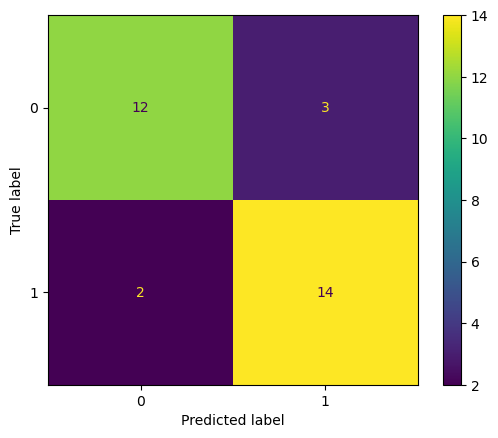

In [32]:
plot_confusion_matrix(model1,X_test,y_test)

In [33]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Performance Curves

**Creating both the precision recall curve and the ROC Curve.**

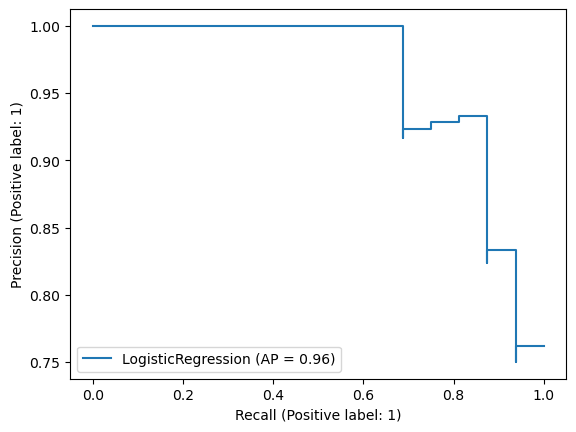

In [35]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve
plot_precision_recall_curve(model1,X_test,y_test)

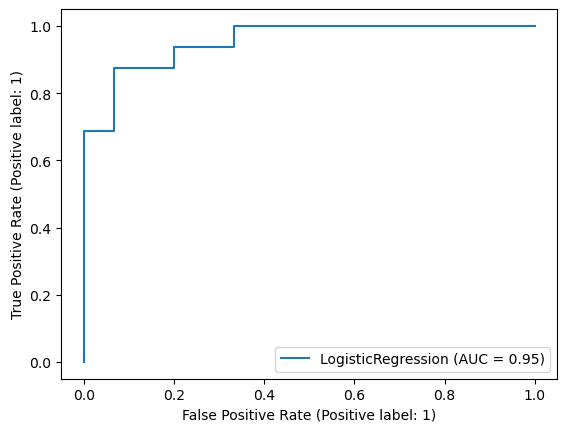

In [36]:
plot_roc_curve(model1,X_test,y_test)

**A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**What does our model predict for this patient? Do they have heart disease?**

In [37]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [43]:
prediction=model1.predict(patient)
prediction

array([0], dtype=int64)

In [44]:
predictionProbability=model2.predict_proba(patient)
predictionProbability

array([[1.00000000e+00, 1.28848973e-18]])

**It predicts the patient to belong to class 0 with the following probability!**